# GRIP : The Sparks Foundation
GRIPMAY23

Data Science and Business Analytics Internship

Name : NITHYA SRI R

TASK 3 :
Exploratory Data Analysis - Retail

Task -

Perform 'Exploratory Data Analysis' on data set ' SampleSuperstore' As a business manager, try to find out the weak areas where you can work to make more profit. what all business problems you can derive by exploring the data?

Dataset : https://bit.ly/3i4rbWl

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

df = pd.read_csv(r"C:\Users\nithy\Downloads\SampleSuperstore\SampleSuperstore.csv")

In [5]:


df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:

df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:

df.shape

(9994, 13)

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:

df.describe()
# only numeric columns are considered

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:

df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:

# check for unique values in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
df.isnull().sum()
#This will output the number of missing values in each column of the DataFrame
     

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
#data cleaning


df.duplicated().sum()

17

In [14]:

df = df.drop_duplicates()


In [15]:

df.duplicated().sum()


0

In [16]:

# The data is only for 1 country, We can remove the country column
df= df.drop('Country', axis=1)

In [17]:

# Since postal code indirectly speaks about State, City in which the data is, we can drop it too
df= df.drop(columns="Postal Code")

In [18]:

df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [19]:

#Exploring dataset types
df.dtypes

Ship Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [24]:
# CORRELATION


# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Calculating correlation
correlation_matrix = numerical_columns.corr()

# Print correlation matrix
print(correlation_matrix)


             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200722 -0.028311  0.479067
Quantity  0.200722  1.000000  0.008678  0.066211
Discount -0.028311  0.008678  1.000000 -0.219662
Profit    0.479067  0.066211 -0.219662  1.000000


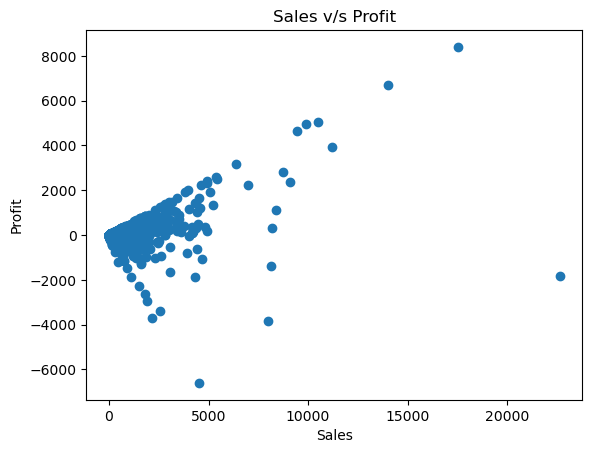

In [27]:
#DATA VISUALIZATION


# sales vs profit
     

#scatter plot
plt.scatter(df['Sales'],df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales v/s Profit')
plt.show()

In [28]:
df['Region'].value_counts()

Region
West       3193
East       2845
Central    2319
South      1620
Name: count, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

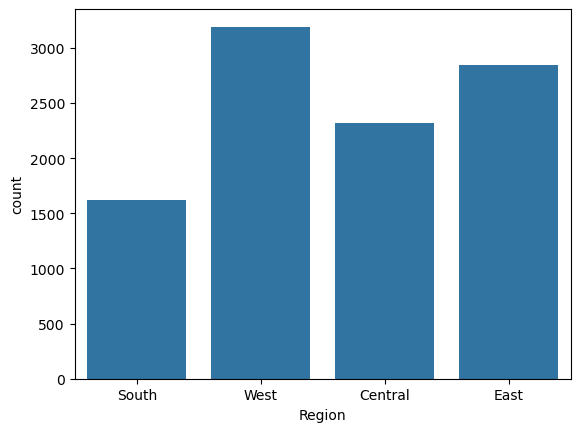

In [29]:
sns.countplot(x=df['Region'])

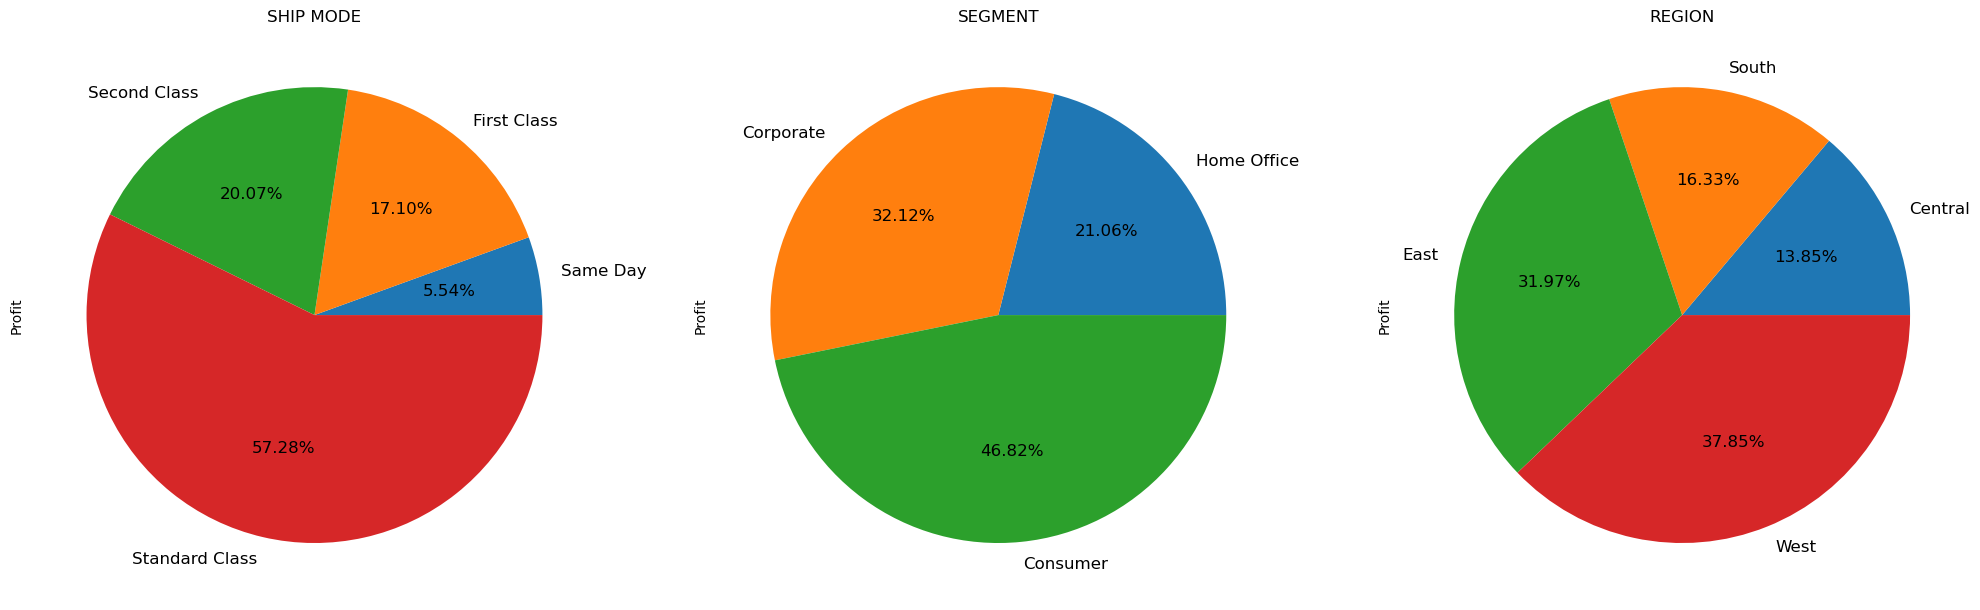

In [30]:
# Plotting Shipmode, Segment, and Region-wise profit
prof_S = pd.DataFrame(df.groupby('Ship Mode').sum()).sort_values('Profit')
prof_G = pd.DataFrame(df.groupby('Segment').sum()).sort_values('Profit')
prof_R = pd.DataFrame(df.groupby('Region').sum()).sort_values('Profit')
fig, ax = plt.subplots(1,3, figsize=(25,12))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)
prof_S.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[0])
prof_G.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[1])
prof_R.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":12}, shadow=False, ax=ax[2])

plt.show() #displaying ShipMode, Segment and Region wise sales summary by profit.
     

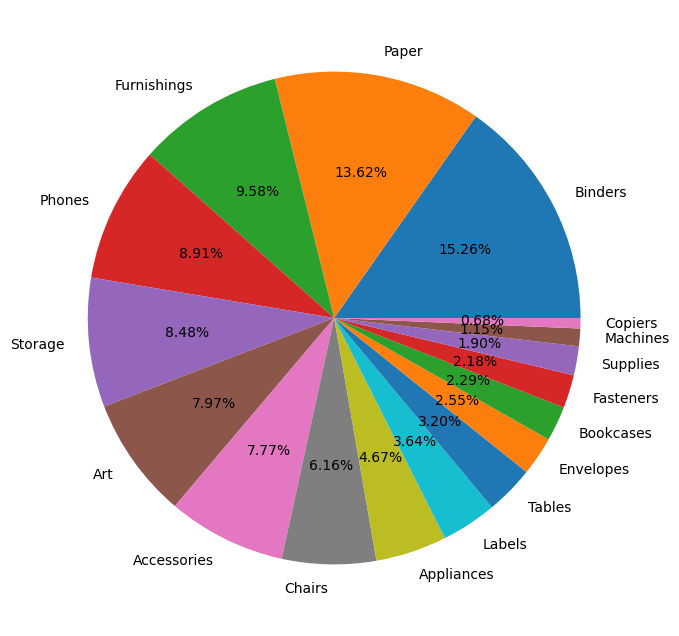

In [31]:
plt.figure(figsize=(8,8))
plt.pie(df["Sub-Category"].value_counts(), labels= df["Sub-Category"].value_counts().index, autopct ="%.2f%%")
plt.show()

In [32]:

profits=df.groupby(["State"])["Profit"].sum().nlargest(10)
profits

#top 10 states

State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64

<Axes: xlabel='State'>

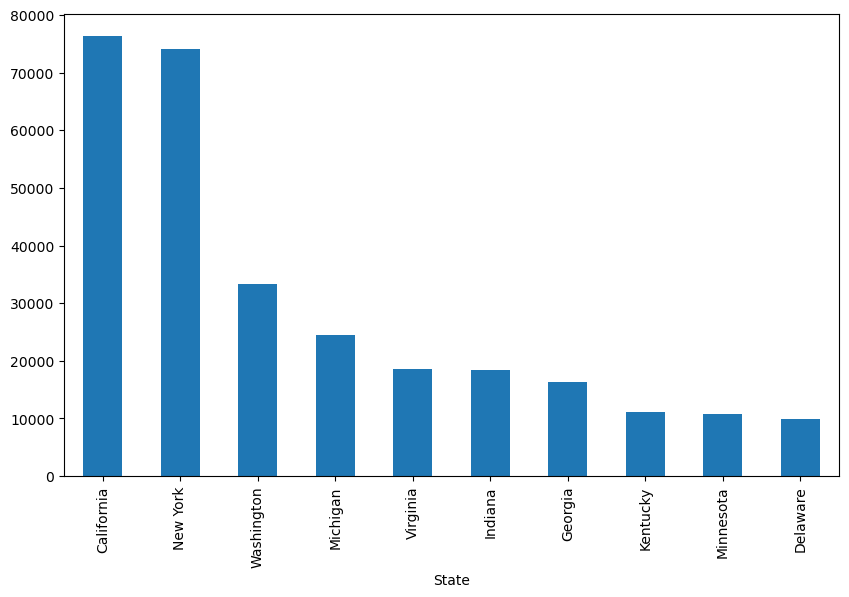

In [33]:

plt.figure(figsize=(10,6))
profits.plot.bar()


In [34]:
cities_profit = pd.DataFrame(df.groupby('City')['Profit'].sum())
cities_profit.reset_index(inplace=True)
     
cities_profit = cities_profit.sort_values( by="Profit",ascending=False)     

# sort the 'cities_profit' DataFrame by 'Profit' column in descending order
sorted_cities_profit = cities_profit.sort_values(by='Profit', ascending=False)

# select the top 10 rows and store them in a new DataFrame
top_10_cities_profit = sorted_cities_profit.head(10)

# print the top 10 cities and their total profits
print(top_10_cities_profit)


              City      Profit
329  New York City  62013.8973
266    Los Angeles  30431.4267
452        Seattle  29121.6825
438  San Francisco  17466.1186
123        Detroit  13146.6935
233      Lafayette  10018.3876
215        Jackson   7581.6828
21         Atlanta   6993.6629
300    Minneapolis   6824.5846
437      San Diego   6377.1960


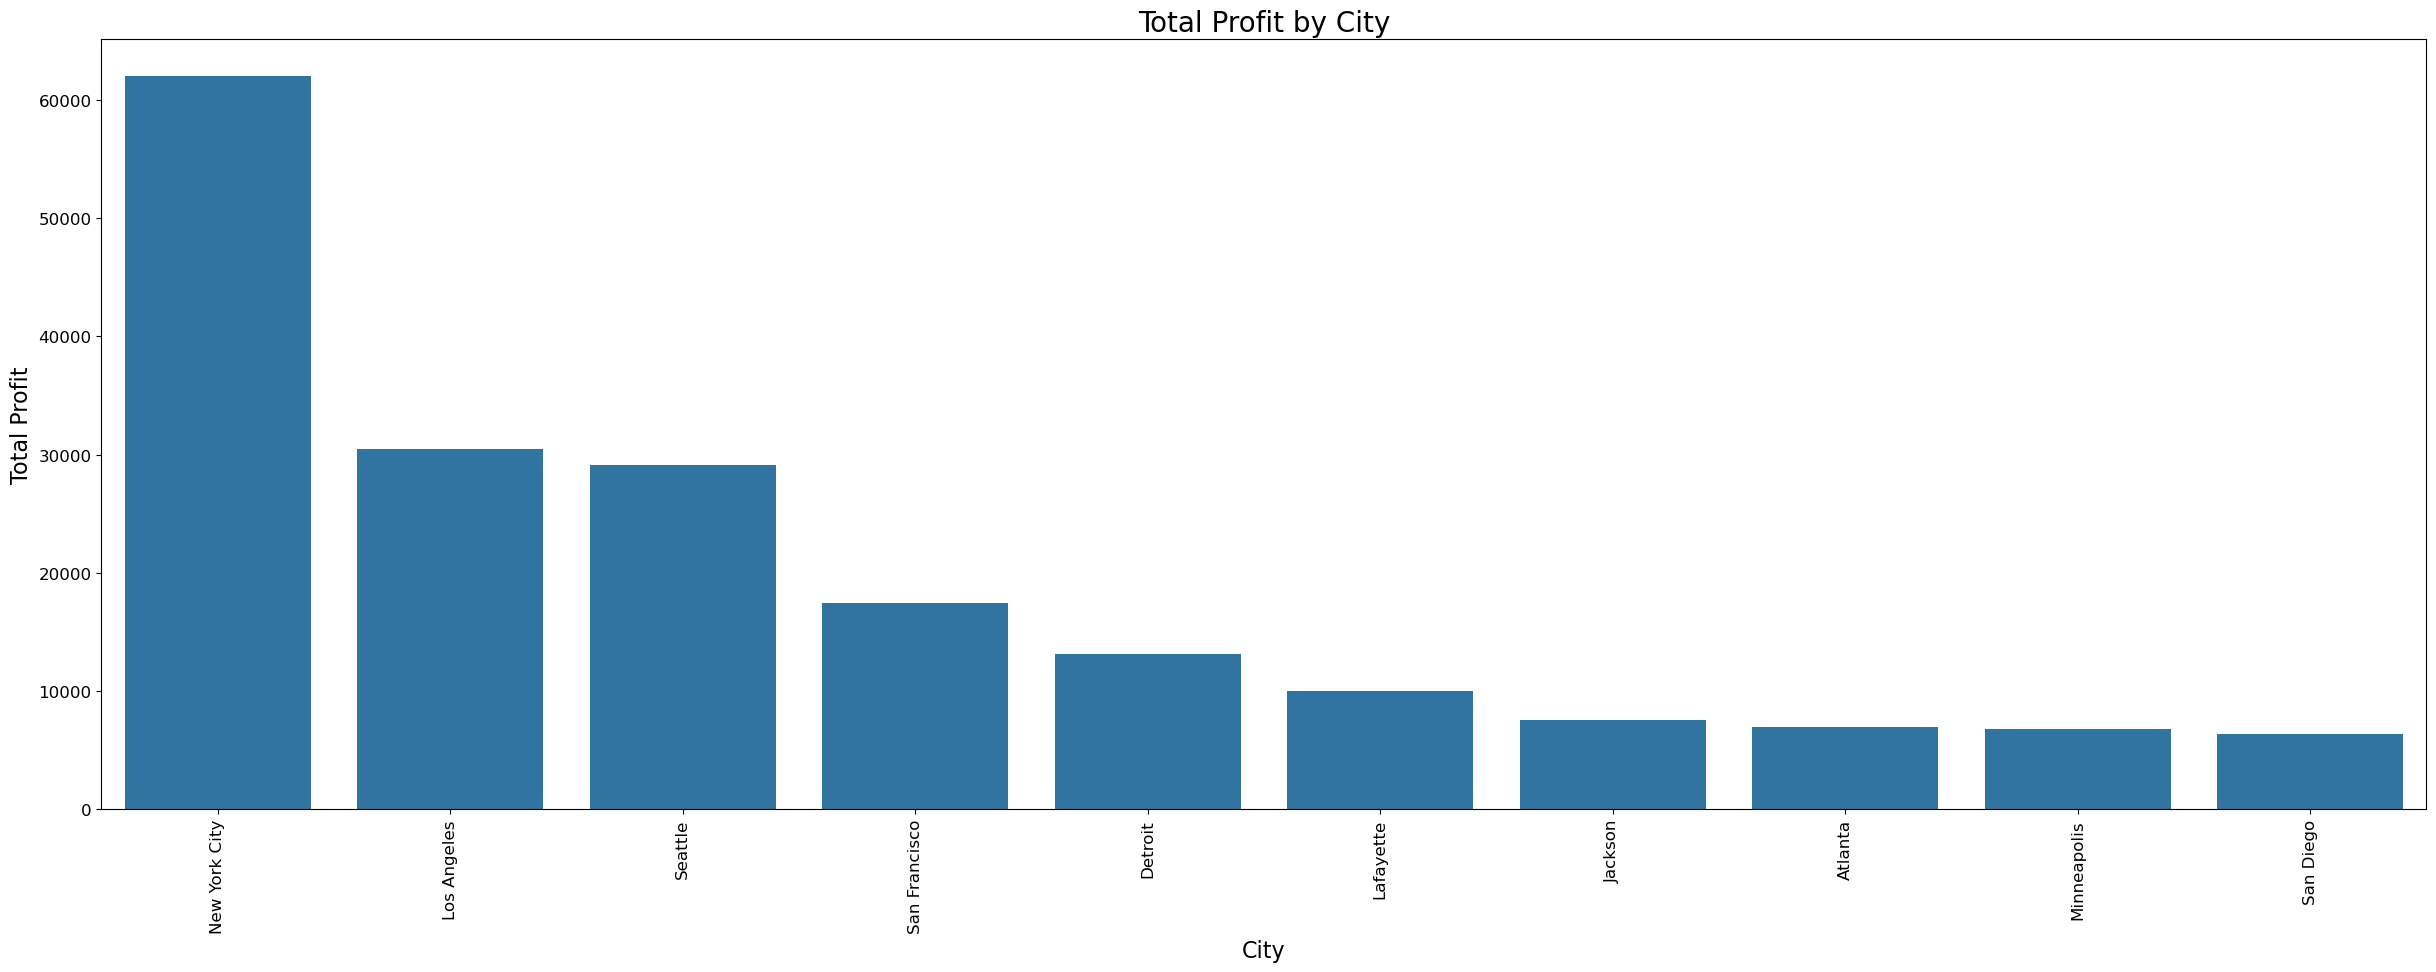

In [35]:

# create a bar chart of the cities and their total profits
plt.figure(figsize=(30,10))
sns.barplot(x='City', y='Profit', data=top_10_cities_profit)
plt.title('Total Profit by City', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Total Profit', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#top 10 cities

<Axes: xlabel='Region'>

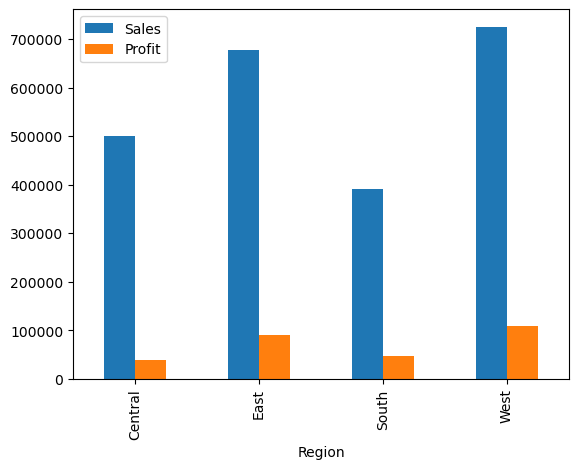

In [36]:
#Region wise analysis


pd.DataFrame(df.groupby('Region').sum()[['Sales','Profit']]).plot(kind='bar')
     


In [38]:
state_wise_sales = pd.DataFrame(df.groupby('State').sum()['Sales']).sort_values(by ='Sales',ascending= False)
state_wise_sales.reset_index(inplace=True)
state_wise_sales.head()

# Top 10 states with maximum amount of sales
print('States with maximum amount of sales:\n',state_wise_sales[:10])

print('\n','='*50, '\n')

# States with minimum amount of sales
print('States with minimum amount of sales:\n',state_wise_sales[-10:])
     

States with maximum amount of sales:
           State        Sales
0    California  457576.2715
1      New York  310827.1510
2         Texas  170124.5418
3    Washington  138560.8100
4  Pennsylvania  116496.3620
5       Florida   89473.7080
6      Illinois   80162.5370
7          Ohio   77976.7640
8      Michigan   75879.6440
9      Virginia   70636.7200


States with minimum amount of sales:
                    State     Sales
39            New Mexico  4783.522
40                  Iowa  4579.760
41                 Idaho  4382.486
42                Kansas  2914.310
43  District of Columbia  2865.020
44               Wyoming  1603.136
45          South Dakota  1315.560
46                 Maine  1270.530
47         West Virginia  1209.824
48          North Dakota   919.910


Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.

Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.

For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.

For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.

Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.